In [1]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# define Model
class Model(nn.Module):
    def __init__(self, in_features=4, out_features=3):
        super().__init__()
        # How many layers? (let's use 2 hiddle layers)
        # First laout with output as 8 features
        self.fc1 = nn.Linear(in_features, 8)
        # Second layers with output 9 
        self.fc2 = nn.Linear(8, 9)
        # Input Layer (4 features) --> h1 N --> h2 N --> output (3 classes)
        self.out = nn.Linear(9, out_features)
    
    def forward(self, x):
        # Fully Connected Layer
        x = self.fc1(x)
        # Activation Function
        x = F.relu(x)
        # Fully Connect Layer ( Hidden Layer )
        x = self.fc2(x)
        # Activation Function 
        x = F.relu(x)
        # Output Layer
        y_pred = self.out(x)
        return y_pred

In [3]:
# Set Random Seed
torch.manual_seed(32)
model = Model()

In [4]:
# train and visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
X = df.drop(columns={'target'}).values
y = df['target'].values

In [8]:
# split train test
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X, 
                                        y, 
                                        test_size=0.2, 
                                        random_state=33
                                    )

In [10]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [11]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
# Loss Fucntion
criterion = nn.CrossEntropyLoss() # since multiclass classification

In [13]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# model.parameters

In [15]:
# Train Model

In [16]:
epochs = 100
losses = [] 

for i in range(epochs):
    # Forward and get a prediction
    y_pred = model.forward(X_train)
    
    # calculate loss or error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss.item())
    
    if i %10 == 0:
        print(f"epoch {i} loss: {loss.item()}")
    
    # Backpropagation 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 loss: 1.1507114171981812
epoch 10 loss: 0.9377315044403076
epoch 20 loss: 0.779825747013092
epoch 30 loss: 0.6099401712417603
epoch 40 loss: 0.40079936385154724
epoch 50 loss: 0.25436320900917053
epoch 60 loss: 0.15053053200244904
epoch 70 loss: 0.10086946189403534
epoch 80 loss: 0.08128317445516586
epoch 90 loss: 0.07231428474187851


Text(0.5, 0, 'Epoch')

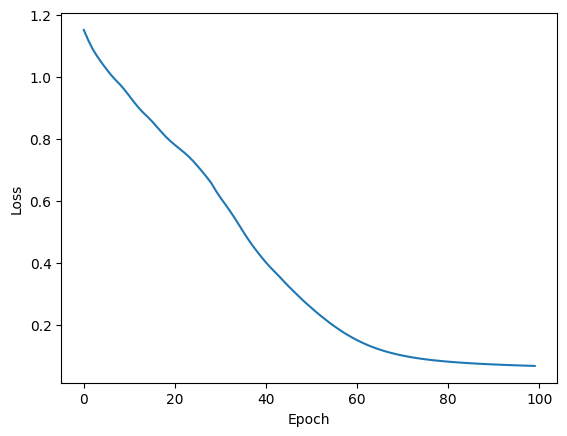

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
# Evaluate with test data

In [19]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [20]:
loss

tensor(0.0581)

In [28]:
# let's count the correct prediction numbers
correct = 0 
with torch.no_grad():
    for i, (x, y) in enumerate(zip(X_test, y_test), 1):
        y_pred = model.forward(x).argmax().item()
        if y == y_pred: correct +=1

        print(f"{i} actual: {y} pred: {y_pred}")

1 actual: 1 pred: 1
2 actual: 1 pred: 1
3 actual: 0 pred: 0
4 actual: 1 pred: 1
5 actual: 2 pred: 2
6 actual: 2 pred: 2
7 actual: 0 pred: 0
8 actual: 0 pred: 0
9 actual: 2 pred: 2
10 actual: 2 pred: 2
11 actual: 2 pred: 2
12 actual: 0 pred: 0
13 actual: 2 pred: 2
14 actual: 1 pred: 1
15 actual: 2 pred: 2
16 actual: 1 pred: 1
17 actual: 2 pred: 2
18 actual: 0 pred: 0
19 actual: 1 pred: 1
20 actual: 2 pred: 2
21 actual: 0 pred: 0
22 actual: 0 pred: 0
23 actual: 2 pred: 2
24 actual: 0 pred: 0
25 actual: 2 pred: 2
26 actual: 2 pred: 2
27 actual: 1 pred: 1
28 actual: 1 pred: 1
29 actual: 2 pred: 2
30 actual: 2 pred: 2


In [29]:
correct

30

In [31]:
# save model
# save only Weight and Bias not the model Architecture 
torch.save(model.state_dict(), 'iris_model.pt')
# To save entire model 
# torch.save(model, 'iris_model.pt')

In [32]:
# Load saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [33]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [34]:
# use trained model to prediction
sample = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [36]:
with torch.no_grad():
    print(new_model(sample).argmax().item())

0
